<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/ai_chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U google-generativeai


# Google AI Studio (Start a new project in Google Cloud)
# VPN


from google.colab import userdata
import google.generativeai as genai

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [3]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


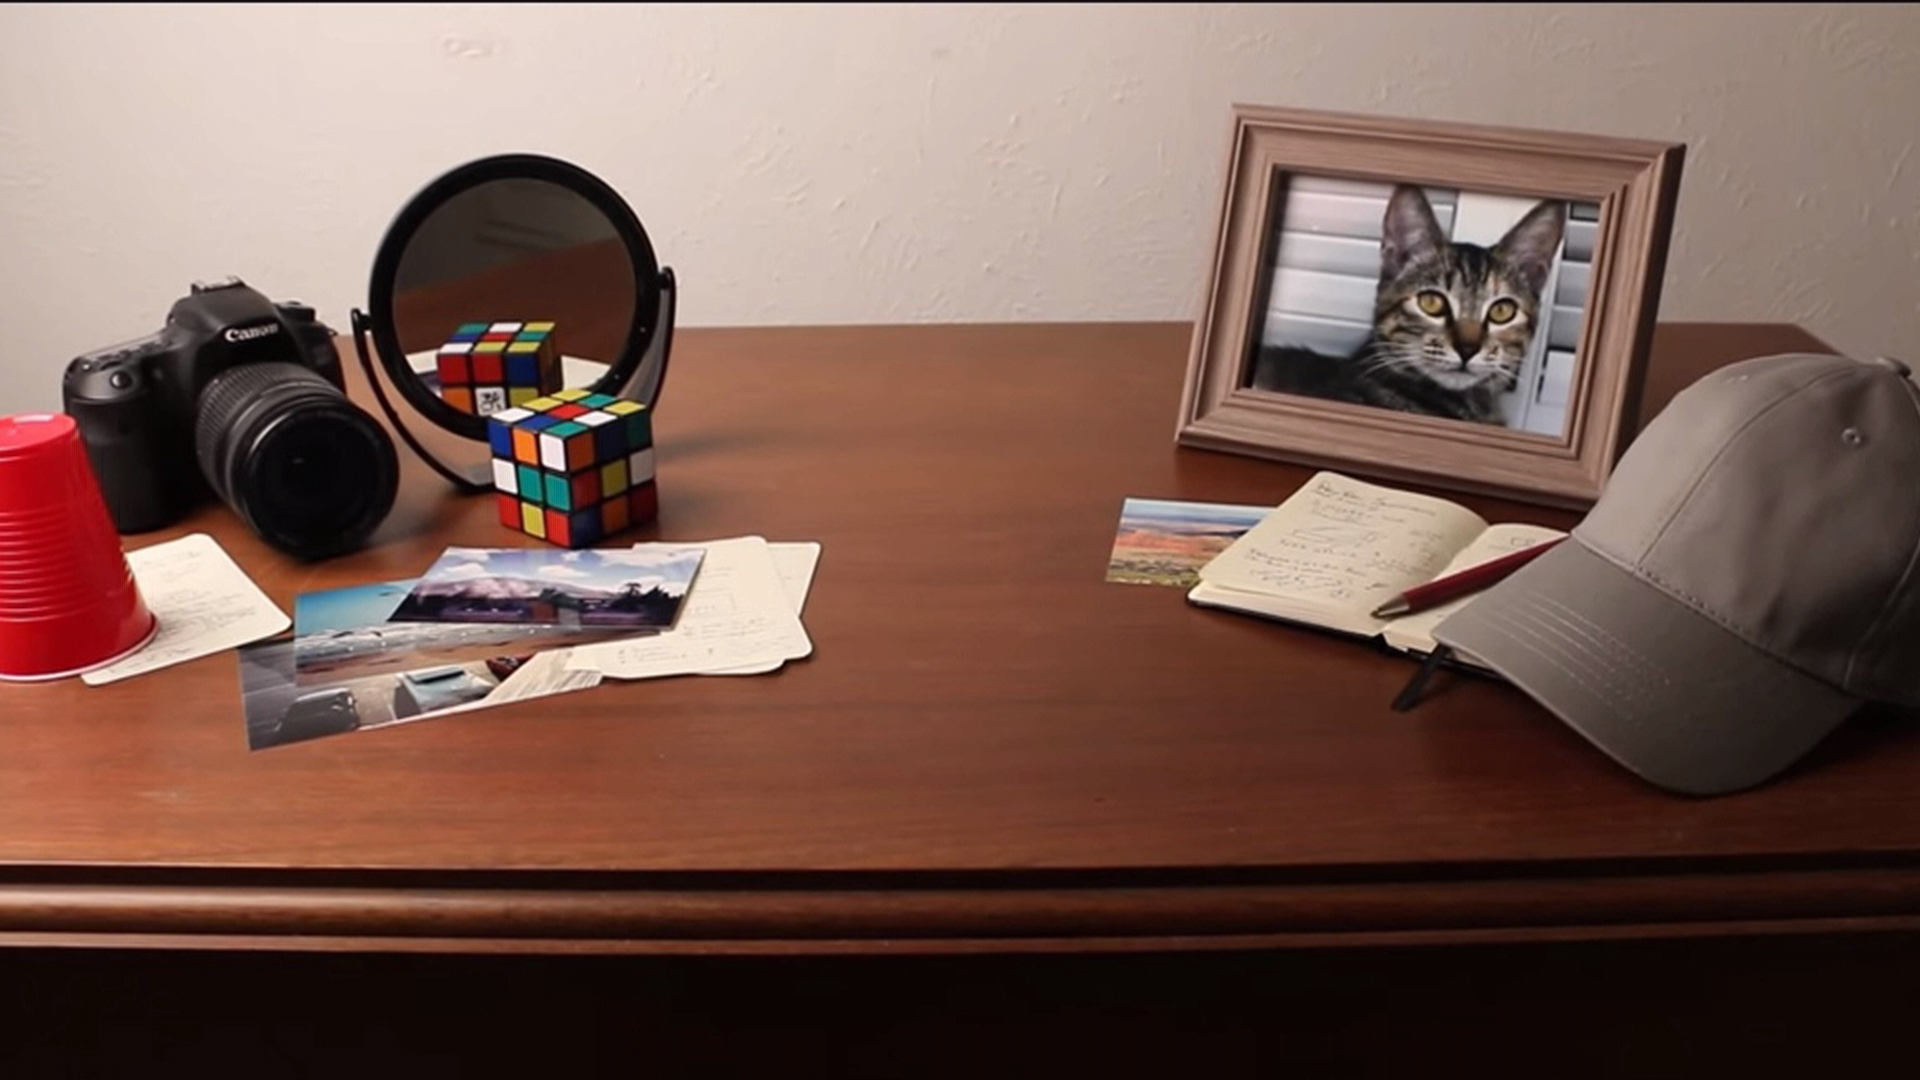

In [4]:
import PIL.Image

img = PIL.Image.open('table.jpg')
img

In [9]:
model = genai.GenerativeModel('gemini-1.5-flash')

prompt = 'descripe a picture'

response = model.generate_content([prompt, img], stream=False)
response.resolve()
print(response.text)

The picture shows a wooden desk with several objects on it. In the center of the picture, a black camera is lying on the desk. To the left of the camera, there is a red plastic cup. To the right of the camera, there is a round mirror. There is a Rubik's Cube in front of the mirror. Behind the camera, there is a white wall. In the bottom right corner of the picture, there is a grey baseball cap. To the right of the baseball cap, there is a small notebook and a red pen. To the left of the notebook, there are some pictures. To the right of the mirror, there is a picture frame with a picture of a cat inside. The background of the picture is a white wall. The desk has a dark brown wood finish.


In [10]:
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
    ),
    history=[]
)

In [23]:
response = chat.send_message("Hi, can you briefly tell me the topic of this technical documentation? Ответь на русском языке")
print(response.text)

Пожалуйста, предоставьте мне текст технической документации, чтобы я мог определить её тему. 😉



In [24]:
document = """Техническая спецификация закупаемых товаров к конкурсной
документации
Номер закупки: № 9614016-1
Наименование
закупки:
"Реконструкция объектов внешней инфраструктуры
(насосная станция, электроснабжение, распределительный
трубопровод)для орошаемого участка площадью 2700 га
Каргалинского района Актюбинской области (241)
Номер лота: № 60657094-ЗЦП1
Наименование лота: Изолятор
Описание лота: фарфоровый, опорно-штыревой
Дополнительное
описание лота:
Изолятор колпачок СТ РК ГОСТ Р 51204-2004 типа К-9
(КП-24) в качестве материала для производства изделий
используется эластичный и устойчивый на растяжение
полиэтилен, он одновременно защищает колпачки от
негативных природных факторов и обеспечивает
продолжительный ресурс работы, Колпачки безотказно и
продолжительно функционируют при температурных
показателях от -60 до +45 градусов,колпачки К 9 устойчивы
к износу и работают на протяжении продолжительного
времени, не нуждаясь в сервисе и замене, крепление
изоляторов при помощи колпачков производится быстро и
просто за счет наличия на их поверхности резьбы. L,мм
±1,0-71,0. Масса, гр Не более-23,0
Количество: 6
Единица измерения: Штука
Места поставки: 151010000, Актюбинская область, г.Актобе По
согласованию с Заказчиком
Срок поставки: 15 календарных дней
Описание и требуемые
функциональные,
технические,
качественные и
эксплуатационные
характеристики
закупаемых товаров:
Изолятор колпачок СТ РК ГОСТ Р 51204-2004 типа К-9
(КП-24) в качестве материала для производства изделий
используется эластичный и устойчивый на растяжение
полиэтилен, он одновременно защищает колпачки от
негативных природных факторов и обеспечивает
продолжительный ресурс работы, Колпачки безотказно и
продолжительно функционируют при температурных
показателях от -60 до +45 градусов,колпачки К 9 устойчивы
к износу и работают на протяжении продолжительного
времени, не нуждаясь в сервисе и замене, крепление
изоляторов при помощи колпачков производится быстро и
просто за счет наличия на их поверхности резьбы. L,мм
±1,0-71,0. Масса, гр Не более-23,0
"""


response = chat.send_message(document)
print(response.text)

Тема этой технической документации - **техническая спецификация на закупку фарфоровых опорно-штыревых изоляторов типа К-9 (КП-24)** для проекта реконструкции объектов внешней инфраструктуры в Каргалинском районе Актюбинской области. 

Документ содержит подробное описание товара, его характеристики, требования к качеству, количеству, срокам поставки, а также место поставки. 



In [25]:
response = chat.send_message("Можно ли отнести данный лот в категорию электрообрудования? Ответь коротко.")
print(response.text)

Да, можно. 



In [26]:
print(chat.history)

[parts {
  text: "Hi, can you briefly tell me the topic of this technical documentation? \320\236\321\202\320\262\320\265\321\202\321\214 \320\275\320\260 \321\200\321\203\321\201\321\201\320\272\320\276\320\274 \321\217\320\267\321\213\320\272\320\265"
}
role: "user"
, parts {
  text: "\320\237\320\276\320\266\320\260\320\273\321\203\320\271\321\201\321\202\320\260, \320\277\321\200\320\265\320\264\320\276\321\201\321\202\320\260\320\262\321\214\321\202\320\265 \320\274\320\275\320\265 \321\202\320\265\320\272\321\201\321\202 \321\202\320\265\321\205\320\275\320\270\321\207\320\265\321\201\320\272\320\276\320\271 \320\264\320\276\320\272\321\203\320\274\320\265\320\275\321\202\320\260\321\206\320\270\320\270, \321\207\321\202\320\276\320\261\321\213 \321\217 \320\274\320\276\320\263 \320\276\320\277\321\200\320\265\320\264\320\265\320\273\320\270\321\202\321\214 \320\265\321\221 \321\202\320\265\320\274\321\203. \360\237\230\211\n"
}
role: "model"
, parts {
  text: "\320\242\320\265\3

In [21]:
chat.history.clear()